In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import h5py

from mpl_toolkits.mplot3d import axes3d
%matplotlib widget

In [2]:
Nc=4
Nf=1

In [3]:
Ns=32
Nt=8

In [4]:
gstar_HSDM = 2*(Nc**2-1)+2*Nf**2
gstar_SM = 106.75
gstar = gstar_SM + gstar_HSDM

In [5]:
MP_GeV = 1.220890 * 10**19 # GeV https://physics.nist.gov/cgi-bin/cuu/Value?plkmc2gev

In [6]:
betas_02 = np.loadtxt("data/betas_mass0p2000.dat")
betas_03 = np.loadtxt("data/betas_mass0p3000.dat")
betas_04 = np.loadtxt("data/betas_mass0p4000.dat")

In [7]:
SclPrime_02 = np.loadtxt("data/beta_Scl_mass0p2000.dat")
SclPrime_03 = np.loadtxt("data/beta_Scl_mass0p3000.dat")
SclPrime_04 = np.loadtxt("data/beta_Scl_mass0p4000.dat")

In [8]:
minima_02 = np.loadtxt("data/minima_data_mass0p2000.dat")
minima_03 = np.loadtxt("data/minima_data_mass0p3000.dat")
minima_04 = np.loadtxt("data/minima_data_mass0p4000.dat")

In [9]:
# beta_m_alat_MB = np.loadtxt("data/beta_m_alat_MB.dat") # from llnl; instead use opt and cov

In [10]:
betac_ibetac_02 = np.loadtxt("data/betac_ibetac_mass0p2000.dat")
betac_ibetac_03 = np.loadtxt("data/betac_ibetac_mass0p3000.dat")
betac_ibetac_04 = np.loadtxt("data/betac_ibetac_mass0p4000.dat")

In [11]:
beta_m_t0hats = np.loadtxt("data/t0hats.dat")
beta_m_MBhats = np.loadtxt("data/MBhats.dat")

In [12]:
beta_m_MBhats

array([[1.07500000e+01, 1.00000000e-02, 9.29575007e-01, 2.69544879e-01],
       [1.08000000e+01, 1.00000000e-02, 8.63074299e-01, 2.49077772e-01],
       [1.08500000e+01, 1.00000000e-02, 8.52429217e-01, 1.57947409e-01],
       [1.08300000e+01, 5.00000000e-02, 1.16022278e+00, 5.48146254e-01],
       [1.08400000e+01, 5.00000000e-02, 1.17229179e+00, 1.25401128e-01],
       [1.08500000e+01, 5.00000000e-02, 1.15893932e+00, 2.13028470e-01],
       [1.08450000e+01, 1.00000000e-01, 1.52655978e+00, 2.86167362e-02],
       [1.08550000e+01, 1.00000000e-01, 1.51101789e+00, 2.99541373e-02],
       [1.08650000e+01, 1.00000000e-01, 1.50742117e+00, 2.26526495e-02],
       [1.09700000e+01, 2.00000000e-01, 1.95275967e+00, 2.83680053e-02],
       [1.09800000e+01, 2.00000000e-01, 1.94748139e+00, 5.76502564e-02],
       [1.09900000e+01, 2.00000000e-01, 1.94013559e+00, 5.26063494e-02],
       [1.10150000e+01, 3.00000000e-01, 2.44975965e+00, 3.30640194e-02],
       [1.10250000e+01, 3.00000000e-01, 2.44422075e

In [13]:
beta_m_MBhats

array([[1.07500000e+01, 1.00000000e-02, 9.29575007e-01, 2.69544879e-01],
       [1.08000000e+01, 1.00000000e-02, 8.63074299e-01, 2.49077772e-01],
       [1.08500000e+01, 1.00000000e-02, 8.52429217e-01, 1.57947409e-01],
       [1.08300000e+01, 5.00000000e-02, 1.16022278e+00, 5.48146254e-01],
       [1.08400000e+01, 5.00000000e-02, 1.17229179e+00, 1.25401128e-01],
       [1.08500000e+01, 5.00000000e-02, 1.15893932e+00, 2.13028470e-01],
       [1.08450000e+01, 1.00000000e-01, 1.52655978e+00, 2.86167362e-02],
       [1.08550000e+01, 1.00000000e-01, 1.51101789e+00, 2.99541373e-02],
       [1.08650000e+01, 1.00000000e-01, 1.50742117e+00, 2.26526495e-02],
       [1.09700000e+01, 2.00000000e-01, 1.95275967e+00, 2.83680053e-02],
       [1.09800000e+01, 2.00000000e-01, 1.94748139e+00, 5.76502564e-02],
       [1.09900000e+01, 2.00000000e-01, 1.94013559e+00, 5.26063494e-02],
       [1.10150000e+01, 3.00000000e-01, 2.44975965e+00, 3.30640194e-02],
       [1.10250000e+01, 3.00000000e-01, 2.44422075e

# Get interpolating/extrapolating functions

In [14]:
def linear( x, c0, c1 ):
    return c0 + c1*x

def fitter( x, c0, c1_0, c1_1, c2_00, c2_01, c2_11 ):
    ainv = x.T[0]
    M = x.T[1]
    return c0 + c1_0*ainv + c1_1*M + c2_00*ainv*ainv + c2_01*ainv*M + c2_11*M*M

In [15]:
beta_m_t0hats

array([[1.08450000e+01, 1.00000000e-01, 1.20861460e+00, 2.46884795e-03],
       [1.08550000e+01, 1.00000000e-01, 1.25751704e+00, 2.84069961e-03],
       [1.08650000e+01, 1.00000000e-01, 1.30977839e+00, 3.28573961e-03],
       [1.09700000e+01, 2.00000000e-01, 1.47166358e+00, 3.20829071e-03],
       [1.09800000e+01, 2.00000000e-01, 1.52466411e+00, 4.01171752e-03],
       [1.09900000e+01, 2.00000000e-01, 1.56609301e+00, 4.35542883e-03],
       [1.10150000e+01, 3.00000000e-01, 1.61883604e+00, 3.71155470e-03],
       [1.10250000e+01, 3.00000000e-01, 1.66857527e+00, 2.93899049e-03],
       [1.10350000e+01, 3.00000000e-01, 1.71299177e+00, 3.34312148e-03],
       [1.10250000e+01, 4.00000000e-01, 1.75090999e+00, 3.63475128e-03],
       [1.10350000e+01, 4.00000000e-01, 1.78732406e+00, 3.61389883e-03],
       [1.10450000e+01, 4.00000000e-01, 1.83366515e+00, 3.98082685e-03]])

In [16]:
np.sqrt( beta_m_t0hats.T[2] )

array([1.09937009, 1.12139067, 1.1444555 , 1.21312142, 1.2347729 ,
       1.25143638, 1.27233488, 1.29173343, 1.30881312, 1.32321956,
       1.3369084 , 1.35412893])

In [17]:
# ainv as a func of beta and mqhat

x1 = beta_m_t0hats.T[0][3:]
x2 = beta_m_t0hats.T[1][3:]

xx = np.array([x1, x2]).T
yy = np.sqrt( beta_m_t0hats.T[2][3:] )
dyy = 0.5 * beta_m_t0hats.T[3][3:]/yy

opt_ainv_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
fit_yy = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [18]:
# ax = plt.figure().add_subplot(projection='3d')

# # setting up a parametric curve
# t = np.arange(0, 2*np.pi+.1, 0.01)
# x, y, z = np.sin(t), np.cos(3*t), np.sin(5*t)

# estep = 15
# i = np.arange(t.size)
# zuplims = (i % estep == 0) & (i // estep % 3 == 0)
# zlolims = (i % estep == 0) & (i // estep % 3 == 2)

# ax.errorbar(x, y, z, 0.2, zuplims=zuplims, zlolims=zlolims, errorevery=estep)

# ax.set_xlabel("X label")
# ax.set_ylabel("Y label")
# ax.set_zlabel("Z label")

# plt.show()

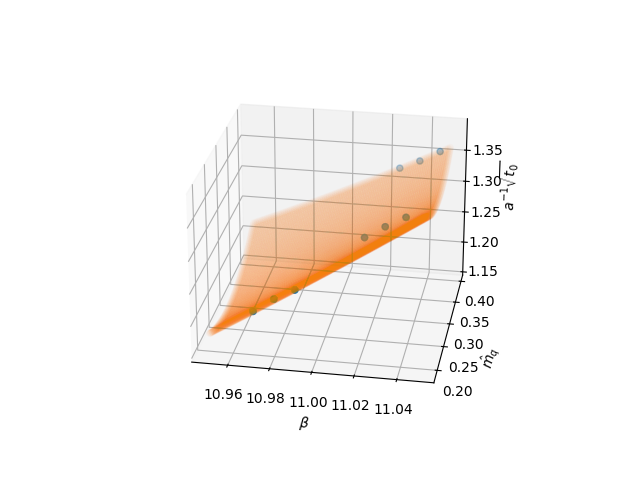

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter( x1, x2, yy )
# zuplims=yy+dyy
# zlolims=yy-dyy
# estep = 1
# ax.errorbar( x1, x2, yy, 0.01, zuplims=zuplims, zlolims=zlolims, errorevery=estep, ls='none')

# ax.scatter( x1, x2, fit_yy )

xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
fit_yy = fitter( np.array([xx1,xx2]).T, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

ax.view_init(elev=25, azim=-80, roll=0)

ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\\hat{m}_q$")
ax.set_zlabel("$a^{-1}\\sqrt{t_0}$")

plt.savefig("./data/ainv.pdf", bbox_inches='tight')

In [20]:
np.savetxt( "./data/coeffs_ainv_beta_mqhat.dat", opt_ainv_beta_mqhat[0])

In [21]:
beta_m_MBs_ = []

for i in range(9):
    beta, mq, MBhat, dMBhat = beta_m_MBhats[9:][i]
    beta_,mq_,t0hat, dt0hat = beta_m_t0hats[3:][i]

    assert abs(beta-beta_)<1.0e-14
    assert abs(mq-mq_)<1.0e-14

    MB = MBhat * np.sqrt(t0hat)
    dMB = np.sqrt( dMBhat**2 * t0hat + (0.5*MBhat*dt0hat)**2/t0hat )

    beta_m_MBs_.append( [beta, mq, MB, dMB] )

beta_m_MBs = np.array( beta_m_MBs_ )

In [22]:
# MB as a func of beta and mqhat

x1 = beta_m_MBs.T[0]
x2 = beta_m_MBs.T[1]

xx = np.array([x1, x2]).T
yy = beta_m_MBs.T[2]
dyy = beta_m_MBs.T[3]

opt_MB_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
fit_yy = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

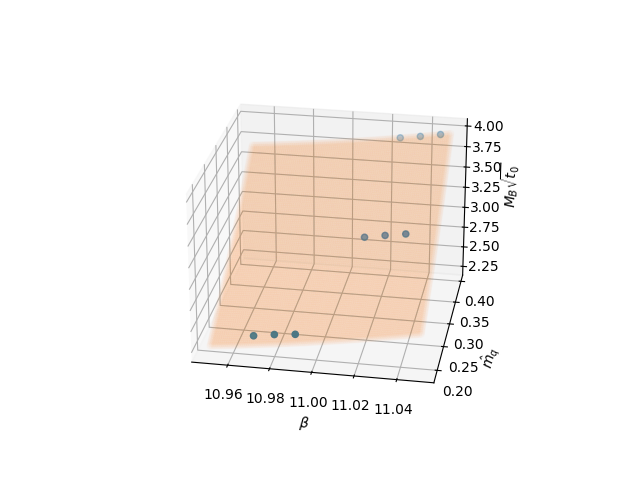

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter( x1, x2, yy )
# ax.scatter( x1, x2, fit_yy )

xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
fit_yy = fitter( np.array([xx1,xx2]).T, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )
ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

ax.view_init(elev=25, azim=-80, roll=0)

ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\\hat{m}_q$")
ax.set_zlabel("$M_B\\sqrt{t_0}$")

plt.savefig("MB.pdf", bbox_inches='tight')

In [24]:
# get ainv for the finite temperature data points

In [25]:
x1 = betas_02 # betas
x2 = np.full( x1.shape[0], 0.2 ) # mqhat
xx = np.array([x1, x2]).T

ainvs_02 = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [26]:
x1 = betas_03 # betas
x2 = np.full( x1.shape[0], 0.3 ) # mqhat
xx = np.array([x1, x2]).T

ainvs_03 = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [27]:
x1 = betas_04 # betas
x2 = np.full( x1.shape[0], 0.4 ) # mqhat
xx = np.array([x1, x2]).T

ainvs_04 = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [28]:
# temperature

In [29]:
Ts_02 = ainvs_02/Nt
Ts_03 = ainvs_03/Nt
Ts_04 = ainvs_04/Nt

In [30]:
# get MB for the finite temperature data points

In [31]:
x1 = betas_02 # betas
x2 = np.full( x1.shape[0], 0.2 ) # mqhat
xx = np.array([x1, x2]).T

MBs_02 = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [32]:
x1 = betas_03 # betas
x2 = np.full( x1.shape[0], 0.3 ) # mqhat
xx = np.array([x1, x2]).T

MBs_03 = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [33]:
x1 = betas_04 # betas
x2 = np.full( x1.shape[0], 0.4 ) # mqhat
xx = np.array([x1, x2]).T

MBs_04 = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [34]:
T_MB_02 = np.array( [Ts_02, MBs_02] ).T
T_MB_03 = np.array( [Ts_03, MBs_03] ).T
T_MB_04 = np.array( [Ts_04, MBs_04] ).T

In [35]:
# get Tc as a function of MB

In [36]:
# Tc_02 = T_MB_02[ int(betac_ibetac_02[1]) ]
# Tc_03 = T_MB_03[ int(betac_ibetac_03[1]) ]
# Tc_04 = T_MB_04[ int(betac_ibetac_04[1]) ]
# Tc_MB = np.array([Tc_02, Tc_03, Tc_04])

In [37]:
# Tc_MB

In [38]:
# opt_Tc_MB = sp.optimize.curve_fit( linear, Tc_MB.T[1], Tc_MB.T[0] )

In [39]:
# plt.clf()
# plt.plot( Tc_MB.T[1], Tc_MB.T[0], marker='o' )
# yy_fit = linear( Tc_MB.T[1], opt_Tc_MB[0][0], opt_Tc_MB[0][1] )
# plt.plot( Tc_MB.T[1], yy_fit, marker='x' )

# plt.xlabel("$M_B$")
# plt.ylabel("$T_c$")
# plt.show()

In [40]:
# Get DVPrime as a func of T and MB @@ linearized around Tc

In [41]:
T_MB_DVPrimes_ = []
for ibeta in SclPrime_02.T[0].astype(int):
    DVPrime = (minima_02.T[3] - minima_02.T[2])[ibeta]
    T, MB = T_MB_02[ibeta]
    T_MB_DVPrimes_.append([T, MB, DVPrime])
T_MV_DVPrimes_02 = np.array(T_MB_DVPrimes_)

In [42]:
T_MB_DVPrimes_ = []
for ibeta in SclPrime_03.T[0].astype(int):
    DVPrime = (minima_03.T[3] - minima_03.T[2])[ibeta]
    T, MB = T_MB_03[ibeta]
    T_MB_DVPrimes_.append([T, MB, DVPrime])
T_MV_DVPrimes_03 = np.array(T_MB_DVPrimes_)

In [43]:
T_MB_DVPrimes_ = []
for ibeta in SclPrime_04.T[0].astype(int):
    DVPrime = (minima_04.T[3] - minima_04.T[2])[ibeta]
    T, MB = T_MB_04[ibeta]
    T_MB_DVPrimes_.append([T, MB, DVPrime])
T_MV_DVPrimes_04 = np.array(T_MB_DVPrimes_)

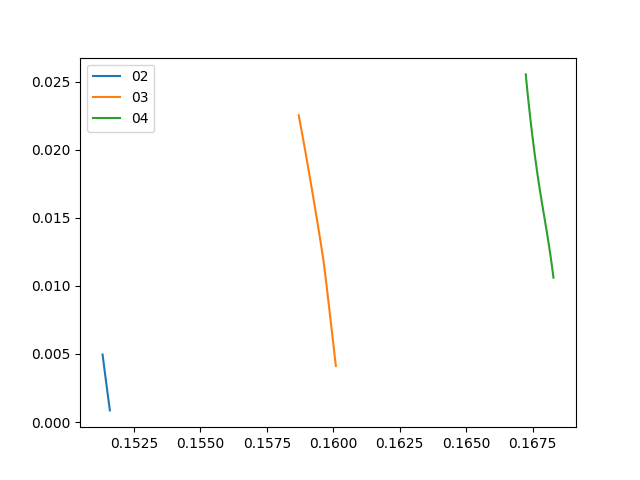

In [44]:
plt.clf()
plt.plot( T_MV_DVPrimes_02.T[0], T_MV_DVPrimes_02.T[2], label='02' )
plt.plot( T_MV_DVPrimes_03.T[0], T_MV_DVPrimes_03.T[2], label='03' )
plt.plot( T_MV_DVPrimes_04.T[0], T_MV_DVPrimes_04.T[2], label='04' )
plt.legend()
plt.show()

In [45]:
T_MV_DVPrimes_04.shape

(108, 3)

In [46]:
# lin
fitm02 = 0
fitm03 = 85
fitm04 = 98

# # quad
# fitm03 = 70
# fitm04 = 60

In [47]:
# plt.plot( T_MV_DVPrimes_02.T[0][fitm02:], T_MV_DVPrimes_02.T[2][fitm02:], label='02' )
# plt.plot( T_MV_DVPrimes_03.T[0][fitm03:], T_MV_DVPrimes_03.T[2][fitm03:], label='03' )
# plt.plot( T_MV_DVPrimes_04.T[0][fitm04:], T_MV_DVPrimes_04.T[2][fitm04:], label='04' )
# plt.legend()

In [48]:
T_con = np.concatenate( (T_MV_DVPrimes_02.T[0][fitm02:], 
                            T_MV_DVPrimes_03.T[0][fitm03:], T_MV_DVPrimes_04.T[0][fitm04:]))
MB_con = np.concatenate( (T_MV_DVPrimes_02.T[1][fitm02:], 
                          T_MV_DVPrimes_03.T[1][fitm03:], T_MV_DVPrimes_04.T[1][fitm04:]))
DVPrime_con = np.concatenate( (T_MV_DVPrimes_02.T[2][fitm02:], 
                           T_MV_DVPrimes_03.T[2][fitm03:], T_MV_DVPrimes_04.T[2][fitm04:]))

In [49]:
def Tc_MB_fitter( MB, Mc, b0, b1, gam1 ):
    return b0+b1*(MB-Mc)**gam1

In [50]:
# def Tc_MB_fitter( MB_, Mc_, b0, b1 ):
#     return b0 + b1*(MB_-Mc_) # + b2*(MB_-Mc_)**2

In [51]:
def DVPrime_fitter(T_MB, Mc, a0, b0, b1, gam0, gam1):
    T = T_MB[0]
    MB = T_MB[1]
    # return ( a0*(MB-Mc) ) *(T - (b0+b1*(MB-Mc) )) # + ( c0 + c1*MB )*T**2
    return ( a0*(MB-Mc)**gam0 ) *(T - Tc_MB_fitter( MB, Mc, b0, b1, gam1 ) ) # + ( c0 + c1*MB )*T**2

In [52]:
# def DVPrime_fitter(T_MB, Mc_, a0, b0, b1, gam0):
#     T = T_MB[0]
#     MB_ = T_MB[1]
#     # return ( a0*(MB-Mc) ) *(T - (b0+b1*(MB-Mc) )) # + ( c0 + c1*MB )*T**2
#     return ( a0*(MB_-Mc_)**gam0 ) *(T - Tc_MB_fitter( MB_, Mc_, b0, b1 ) ) # + ( c0 + c1*MB )*T**2

In [53]:
# def DVPrime_fitter(T_MB, Mc, c1, gamma):
#     T = T_MB[0]
#     MB = T_MB[1]
#     return c1*(MB-Mc)**gamma * T

In [54]:
opt_DVPrime_T_MB = sp.optimize.curve_fit( DVPrime_fitter, [T_con, MB_con], DVPrime_con,
                                       p0=[ 2.01669533e+00, -1.71223422e+01,  1.45744805e-01,  1.16275831e-02, 1.0, 1.0 ]
                                       )
opt_DVPrime_T_MB

(array([ 2.35870148e+00, -2.04623768e+01,  1.51512126e-01,  1.12376346e-02,
         2.81581389e-02,  9.58833102e-01]),
 array([[ 8.73045947e-05,  4.69894915e-04,  1.13824151e-06,
         -1.94453383e-07, -9.86981513e-05,  1.56928740e-05],
        [ 4.69894915e-04,  4.19647876e-03,  6.12239715e-06,
         -1.00642151e-06, -5.51523906e-04,  8.33398279e-05],
        [ 1.13824151e-06,  6.12239715e-06,  1.48405680e-08,
         -2.53594864e-09, -1.28610392e-06,  2.04628637e-07],
        [-1.94453383e-07, -1.00642151e-06, -2.53594864e-09,
          4.34783749e-10,  2.18692931e-07, -3.50118981e-08],
        [-9.86981513e-05, -5.51523906e-04, -1.28610392e-06,
          2.18692931e-07,  1.12601060e-04, -1.77046548e-05],
        [ 1.56928740e-05,  8.33398279e-05,  2.04628637e-07,
         -3.50118981e-08, -1.77046548e-05,  2.82546457e-06]]))

In [55]:
# opt_DVPrime_T_MB = sp.optimize.curve_fit( DVPrime_fitter, [T_con, MB_con], DVPrime_con,
#                                        p0=[ 2.01669533e+00, -1.71223422e+01,  1.45744805e-01,  1.16275831e-02, 1.0 ]
#                                        )
# opt_DVPrime_T_MB

In [56]:
# opt_DVPrime_T_MB = sp.optimize.curve_fit( DVPrime_fitter, [T_con, MB_con], DVPrime_con,
#                                        p0=[ 2.32044376e+00, -1.80407870e+01,  1.48879180e-01,  1.22677786e-02,
#         -1.39642133e-04,  1.99489922e-02 ]
#                                        )
# opt_DVPrime_T_MB

In [57]:
Mc = opt_DVPrime_T_MB[0][0]
Mc

2.3587014813277

In [58]:
MB_con

array([2.36494054, 2.36508205, 2.36522361, 2.36536523, 2.36550689,
       2.3656486 , 2.36579036, 2.36593217, 2.36607403, 2.36621594,
       2.3663579 , 2.36649991, 2.36664197, 2.36678408, 2.36692624,
       2.36706845, 2.3672107 , 2.36735301, 2.36749537, 2.36763778,
       2.36778023, 2.36792274, 2.3680653 , 2.3682079 , 3.12543745,
       3.12561641, 3.12579541, 3.12597446, 3.12615357, 3.12633272,
       3.12651192, 3.12669117, 3.12687047, 3.12704982, 3.12722922,
       3.12740868, 3.12758818, 3.12776773, 3.12794732, 3.12812697,
       3.12830667, 3.12848642, 3.12866622, 3.12884607, 3.12902597,
       3.12920592, 3.12938591, 3.12956596, 3.12974606, 3.1299262 ,
       3.1301064 , 3.13028665, 3.13046694, 3.13064729, 3.13082768,
       3.13100813, 3.13118862, 3.13136917, 3.13154976, 3.13173041,
       3.1319111 , 3.13209184, 3.13227264, 3.13245348, 3.13263437,
       3.13281532, 3.92370793, 3.92389826, 3.92408865, 3.92427908,
       3.92446957, 3.9246601 , 3.92485068, 3.92504132, 3.92523

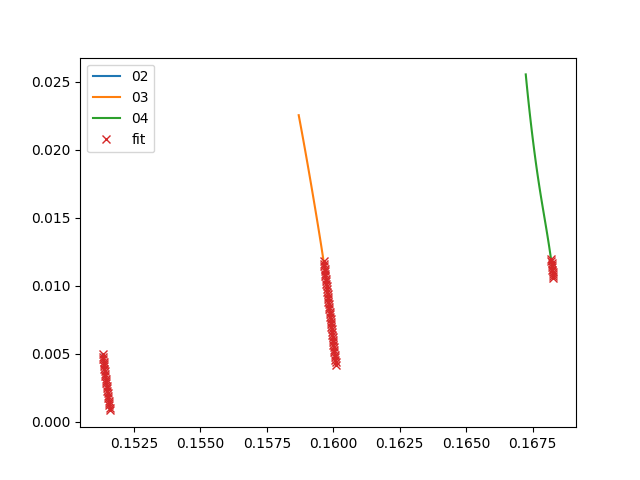

In [59]:
plt.clf()
plt.plot( T_MV_DVPrimes_02.T[0], T_MV_DVPrimes_02.T[2], label='02' )
plt.plot( T_MV_DVPrimes_03.T[0], T_MV_DVPrimes_03.T[2], label='03' )
plt.plot( T_MV_DVPrimes_04.T[0], T_MV_DVPrimes_04.T[2], label='04' )

xx2 = [T_con, MB_con]
yy_fit2 = DVPrime_fitter( xx2,
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )

plt.plot( xx2[0], yy_fit2, label='fit', marker='x', ls='none' )
plt.legend()
plt.show()

In [60]:
def Tc_(MB_):
    return Tc_MB_fitter( MB_, opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], opt_DVPrime_T_MB[0][5] )

In [61]:
TmTc_MB_DVPrimes_ = []
for ibeta in SclPrime_02.T[0].astype(int):
    DVPrime = (minima_02.T[3] - minima_02.T[2])[ibeta]
    T, MB = T_MB_02[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_DVPrimes_.append([T-Tc, MB, DVPrime])
TmTc_MV_DVPrimes_02 = np.array(TmTc_MB_DVPrimes_)

In [62]:
TmTc_MB_DVPrimes_ = []
for ibeta in SclPrime_03.T[0].astype(int):
    DVPrime = (minima_03.T[3] - minima_03.T[2])[ibeta]
    T, MB = T_MB_03[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_DVPrimes_.append([T-Tc, MB, DVPrime])
TmTc_MV_DVPrimes_03 = np.array(TmTc_MB_DVPrimes_)

In [63]:
TmTc_MB_DVPrimes_ = []
for ibeta in SclPrime_04.T[0].astype(int):
    DVPrime = (minima_04.T[3] - minima_04.T[2])[ibeta]
    T, MB = T_MB_04[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_DVPrimes_.append([T-Tc, MB, DVPrime])
TmTc_MV_DVPrimes_04 = np.array(TmTc_MB_DVPrimes_)

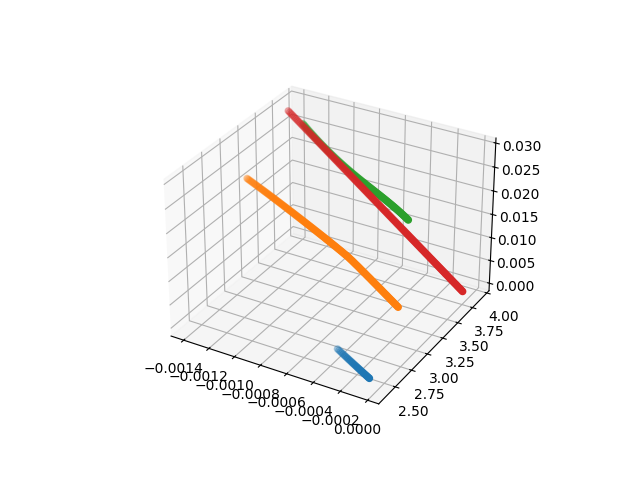

In [64]:
plt.clf()
ax = plt.axes(projection='3d')
ax.scatter( TmTc_MV_DVPrimes_02.T[0], TmTc_MV_DVPrimes_02.T[1], TmTc_MV_DVPrimes_02.T[2] )
ax.scatter( TmTc_MV_DVPrimes_03.T[0], TmTc_MV_DVPrimes_03.T[1], TmTc_MV_DVPrimes_03.T[2] )
ax.scatter( TmTc_MV_DVPrimes_04.T[0], TmTc_MV_DVPrimes_04.T[1], TmTc_MV_DVPrimes_04.T[2] )

# xx21, xx22 = TmTc_con, MB_con
xx21=np.arange(-0.0014, -0.00001, 0.00001)
xx22=np.full(xx21.shape[0], 3.8)
xx2=np.array([xx21+Tc_(xx22), xx22])
# xx2 = [TmTc_con, MB_con]
yy_fit2 = DVPrime_fitter( xx2,
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
ax.scatter( xx21, xx22, yy_fit2 )
plt.show()

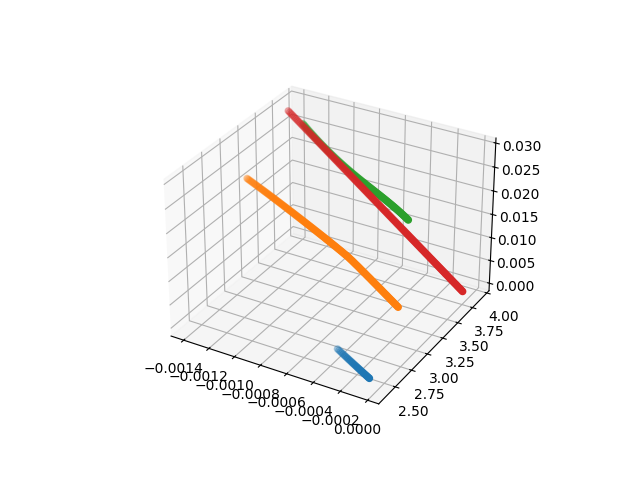

In [65]:
plt.clf()
ax = plt.axes(projection='3d')
ax.scatter( TmTc_MV_DVPrimes_02.T[0], TmTc_MV_DVPrimes_02.T[1], TmTc_MV_DVPrimes_02.T[2] )
ax.scatter( TmTc_MV_DVPrimes_03.T[0], TmTc_MV_DVPrimes_03.T[1], TmTc_MV_DVPrimes_03.T[2] )
ax.scatter( TmTc_MV_DVPrimes_04.T[0], TmTc_MV_DVPrimes_04.T[1], TmTc_MV_DVPrimes_04.T[2] )

# xx21, xx22 = TmTc_con, MB_con
xx21=np.arange(-0.0014, -0.00001, 0.00001)
xx22=np.full(xx21.shape[0], 3.8)
xx2=np.array([xx21+Tc_(xx22), xx22])
# xx2 = [TmTc_con, MB_con]
yy_fit2 = DVPrime_fitter( xx2,
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
ax.scatter( xx21, xx22, yy_fit2 )
plt.show()

/tmp/ipykernel_93781/1470169282.py:2: RuntimeWarning: invalid value encountered in power
  return b0+b1*(MB-Mc)**gam1
/tmp/ipykernel_93781/3660795692.py:5: RuntimeWarning: invalid value encountered in power
  return ( a0*(MB-Mc)**gam0 ) *(T - Tc_MB_fitter( MB, Mc, b0, b1, gam1 ) ) # + ( c0 + c1*MB )*T**2


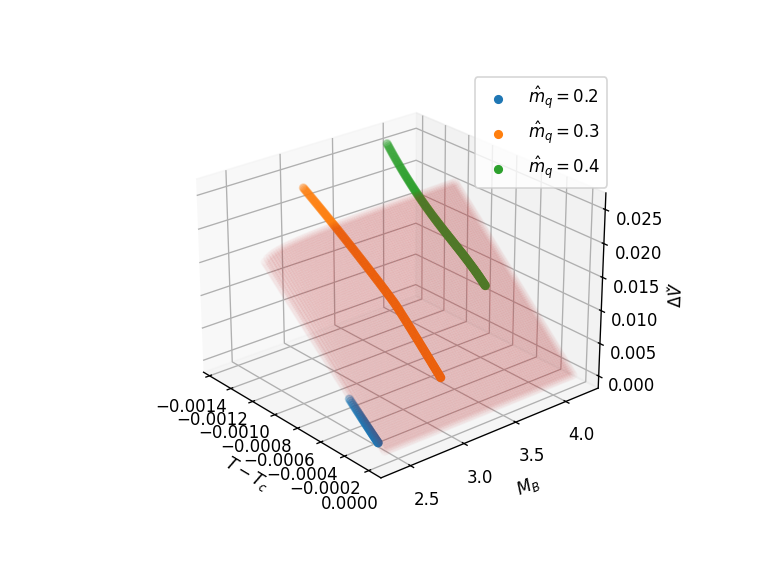

In [66]:
plt.clf()
ax = plt.axes(projection='3d')

ax.scatter( TmTc_MV_DVPrimes_02.T[0], TmTc_MV_DVPrimes_02.T[1], TmTc_MV_DVPrimes_02.T[2], label='$\\hat{m}_q=0.2$' )
ax.scatter( TmTc_MV_DVPrimes_03.T[0], TmTc_MV_DVPrimes_03.T[1], TmTc_MV_DVPrimes_03.T[2], label='$\\hat{m}_q=0.3$' )
ax.scatter( TmTc_MV_DVPrimes_04.T[0], TmTc_MV_DVPrimes_04.T[1], TmTc_MV_DVPrimes_04.T[2], label='$\\hat{m}_q=0.4$' )

xx1 = np.repeat(np.linspace(-0.001, 0.0, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(2.0, 4.2, 100), 100).reshape(100,100).T
yy_fit2 = DVPrime_fitter( [xx1+Tc_(xx2),xx2],
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                         opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
ax.scatter( xx1, xx2, yy_fit2, alpha=0.02 )

ax.view_init(elev=25, azim=-40, roll=0)

ax.set_xlabel("$T-T_c$")
ax.set_ylabel("$M_B$")
ax.set_zlabel("$\\Delta {V}\\check$")

plt.legend()

plt.savefig("DeltaV.pdf", bbox_inches='tight')
plt.show()

In [67]:
# Get SclPrime as a func of TmTc and MB @@@ but only around MBs for mq=0.3, 0.4

In [68]:
TmTc_MB_SclPrime_02_=[]
for row in SclPrime_02:
    ibeta = int(row[0])
    SclPrime = row[2]
    T, MB = T_MB_02[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_SclPrime_02_.append( [T-Tc, MB, SclPrime] )
TmTc_MB_SclPrime_02 = np.array( TmTc_MB_SclPrime_02_ )

In [69]:
TmTc_MB_SclPrime_03_=[]
for row in SclPrime_03:
    ibeta = int(row[0])
    SclPrime = row[2]
    T, MB = T_MB_03[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_SclPrime_03_.append( [T-Tc, MB, SclPrime] )
TmTc_MB_SclPrime_03 = np.array( TmTc_MB_SclPrime_03_ )

In [70]:
TmTc_MB_SclPrime_04_=[]
for row in SclPrime_04:
    ibeta = int(row[0])
    SclPrime = row[2]
    T, MB = T_MB_04[ibeta]
    Tc =  Tc_(MB)
    TmTc_MB_SclPrime_04_.append( [T-Tc, MB, SclPrime] )
TmTc_MB_SclPrime_04 = np.array( TmTc_MB_SclPrime_04_ )

In [71]:
# lin
fitm02 = 16
fitm03 = 105
fitm04 = 70

In [72]:
TmTc_con = np.concatenate( (TmTc_MB_SclPrime_02[fitm02:].T[0], 
                            TmTc_MB_SclPrime_03[fitm03:].T[0], TmTc_MB_SclPrime_04[fitm04:].T[0]))
MB_con = np.concatenate( (TmTc_MB_SclPrime_02[fitm02:].T[1], 
                          TmTc_MB_SclPrime_03[fitm03:].T[1], TmTc_MB_SclPrime_04[fitm04:].T[1]))
SclPrime_con = np.concatenate( (TmTc_MB_SclPrime_02[fitm02:].T[2], 
                           TmTc_MB_SclPrime_03[fitm03:].T[2], TmTc_MB_SclPrime_04[fitm04:].T[2]))

In [73]:
# def SclPrime_fitter(TmTc_MB, a0, a1, b0, b1, c0, c1):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a1*(MB-Mc) + (b1*(MB-Mc))/TmTc + (c1*(MB-Mc))/TmTc**2

In [74]:
# def SclPrime_fitter(TmTc_MB, a0, a1, b1, c1, gam1, gam2):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a0 + a1*MB + (b1*(MB-Mc)**gam1)/TmTc + (c1*(MB-Mc)**gam2)/TmTc**2

In [75]:
# def SclPrime_fitter(TmTc_MB, b1, c1, gam1, gam2):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return (b1*(MB-Mc)**gam1 )/TmTc + (c1*(MB-Mc)**gam2 )/TmTc**2

In [76]:
# def SclPrime_fitter(TmTc_MB, c1, c2, gam ):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return c1*(MB-Mc)**gam/TmTc + c2*(MB-Mc)**(2.*gam)/TmTc**2 # * ( 1.0 + a1*TmTc + b1*(MB-Mc) )

In [77]:
# def SclPrime_fitter(TmTc_MB, a1, b1, c1):
#     TmTc = TmTc_MB[0]
#     MB = TmTc_MB[1]
#     return a1*(MB-Mc) + (b1*(MB-Mc))/TmTc + (c1*(MB-Mc))/TmTc**2

In [78]:
def SclPrime_fitter(TmTc_MB, b, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return c1*(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc + c2*(MB-Mc)**(2.*gam) * (1.0 + b/(MB-Mc) )**2/TmTc**2 # * ( 1.0 + a1*TmTc + b1*(MB-Mc) )

In [79]:
opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
                                       p0=[0.0, 0.002, 5.09222531e-06, 1.4]
                                       )
opt_SclPrime_TmTc_MB

(array([-8.44710687e-02,  9.56439061e-04,  5.39398425e-06,  1.33857001e+00]),
 array([[ 2.31720594e-04,  5.78901349e-07, -2.58239494e-09,
          2.44672386e-04],
        [ 5.78901349e-07,  4.94436491e-08,  1.21543853e-11,
          2.60322470e-07],
        [-2.58239494e-09,  1.21543853e-11,  3.63050444e-14,
         -2.91391282e-09],
        [ 2.44672386e-04,  2.60322470e-07, -2.91391282e-09,
          2.77717318e-04]]))

In [80]:
# opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
#                                        p0=[0.002, 5.09222531e-06, 1.4]
#                                        )
# opt_SclPrime_TmTc_MB

In [81]:
# opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
#                                        p0=[0.0, 0.0, 2.09222531e-03, 5.36713214e-06, 2.19688902e+00, 2.97046528e+00]
#                                        )
# opt_SclPrime_TmTc_MB

In [82]:
# opt_SclPrime_TmTc_MB = sp.optimize.curve_fit( SclPrime_fitter, [TmTc_con, MB_con], SclPrime_con,
#                                        p0=[2.09222531e-03, 5.36713214e-06, 0.0, 2.19688902e+00, 2.97046528e+00]
#                                        )
# opt_SclPrime_TmTc_MB

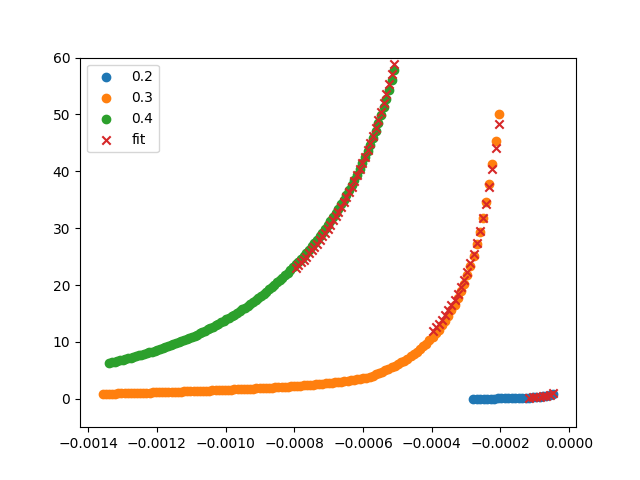

In [83]:
fig = plt.figure()
# ax = plt.axes(projection='3d')
plt.scatter( TmTc_MB_SclPrime_02.T[0], TmTc_MB_SclPrime_02.T[2], label="0.2" )
plt.scatter( TmTc_MB_SclPrime_03.T[0], TmTc_MB_SclPrime_03.T[2], label="0.3" )
plt.scatter( TmTc_MB_SclPrime_04.T[0], TmTc_MB_SclPrime_04.T[2], label="0.4" )

xx21, xx22 = TmTc_con, MB_con
# xx21=np.arange(-0.0014, -0.00001, 0.00001)
# xx22=np.full(xx21.shape[0], 2.4)
xx2=np.array([xx21, xx22])
yy_fit2 = SclPrime_fitter( xx2,
                opt_SclPrime_TmTc_MB[0][0], 
                          opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3], 
                          # opt_SclPrime_TmTc_MB[0][4],
                          # opt_SclPrime_TmTc_MB[0][4], opt_SclPrime_TmTc_MB[0][5], 
               )
plt.scatter( xx21, yy_fit2, marker='x', label="fit" )

plt.ylim(-5, 60)
# ax.set_zlim(0,50)
# ax.set_zlim(0,1)
# plt.savefig("global_fit.pdf")
plt.legend()
plt.show()

In [84]:
Mc

2.3587014813277

/tmp/ipykernel_93781/2666109490.py:4: RuntimeWarning: invalid value encountered in power
  return c1*(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc + c2*(MB-Mc)**(2.*gam) * (1.0 + b/(MB-Mc) )**2/TmTc**2 # * ( 1.0 + a1*TmTc + b1*(MB-Mc) )


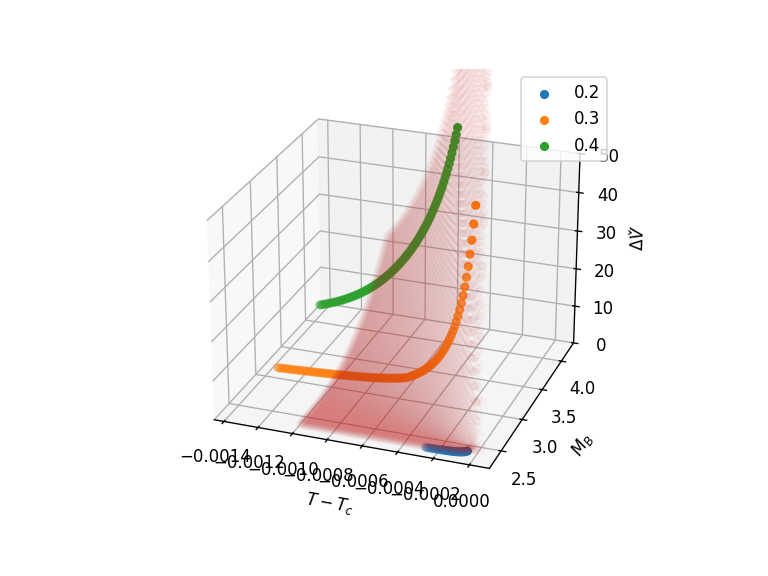

In [85]:
plt.clf()
ax = plt.axes(projection='3d')


ax.scatter( TmTc_MB_SclPrime_02.T[0], TmTc_MB_SclPrime_02.T[1], TmTc_MB_SclPrime_02.T[2], label="0.2" )
ax.scatter( TmTc_MB_SclPrime_03.T[0], TmTc_MB_SclPrime_03.T[1], TmTc_MB_SclPrime_03.T[2], label="0.3" )
ax.scatter( TmTc_MB_SclPrime_04.T[0], TmTc_MB_SclPrime_04.T[1], TmTc_MB_SclPrime_04.T[2], label="0.4" )

xx1 = np.repeat(np.linspace(-0.001, 0.00001, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(2.3, 4.2, 100), 100).reshape(100,100).T
yy_fit2 = SclPrime_fitter( [xx1,xx2],
                opt_SclPrime_TmTc_MB[0][0], opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3],
                          # opt_SclPrime_TmTc_MB[0][4], # opt_SclPrime_TmTc_MB[0][5], 
               )
ax.scatter( xx1, xx2, yy_fit2, alpha=0.02 )

ax.set_zlim( 0.0, 50.0 )

ax.view_init(elev=25, azim=-70, roll=0)

ax.set_xlabel("$T-T_c$")
ax.set_ylabel("$M_B$")
ax.set_zlabel("$\\Delta {V}\\check$")

plt.legend()

plt.savefig("scl.pdf", bbox_inches='tight')
plt.show()

In [86]:
def GamPrime( T_, Tc_, MB_ ):
    SclPrime = SclPrime_fitter( [T_-Tc_, MB_] ,
                opt_SclPrime_TmTc_MB[0][0], opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3],
                               # opt_SclPrime_TmTc_MB[0][4], # opt_SclPrime_TmTc_MB[0][5], 
               )
    coeff = (SclPrime/(2.0*np.pi))**(3.0/2.0)
    efactor = np.exp( -SclPrime )
    return coeff * efactor

# Get Tstar

In [87]:
finalres_=[]

In [88]:
beta_m_alat_MB

NameError: name 'beta_m_alat_MB' is not defined

In [525]:
# best: (50.0, 3.95) -- (200.0, 3.95)

In [565]:
# MBGeV = 2.0
# MBGeV = 10.0
# MBGeV = 50.0
# MBGeV = 100.0
# MBGeV = 200.0
# MBGeV = 500.0
MBGeV = 2000.0

In [566]:
finalres_

[[0.1501595782410117,
  1.7922382650393805e-19,
  15.384615384615385,
  3.25,
  0.1614177750210371],
 [0.32351923286295253,
  4.6114387300232434e-20,
  17.24137931034483,
  2.9,
  0.15767419991590864],
 [0.07009221128393926,
  3.9294462330115797e-20,
  3.4482758620689657,
  2.9,
  0.15767619991590864],
 [0.013220573386467274,
  6.889485721869404e-19,
  2.531645569620253,
  3.95,
  0.16870932124064295],
 [0.43403804805089874,
  1.257664719869601e-21,
  3.9215686274509807,
  2.55,
  0.15380083585578402],
 [0.0321342116646263,
  1.5652449381369532e-19,
  3.076923076923077,
  3.25,
  0.1614212750210371],
 [0.09044333862575976,
  4.227048215126573e-19,
  13.88888888888889,
  3.6,
  0.16508630756184325],
 [0.06169576859258447,
  7.910684149641432e-19,
  12.658227848101266,
  3.95,
  0.16870132124064294],
 [0.11978050821891995,
  8.395664448201096e-19,
  25.31645569620253,
  3.95,
  0.16869782124064295],
 [0.11978050821891995,
  8.395664448201096e-19,
  25.31645569620253,
  3.95,
  0.16869782

In [567]:
# MB = 2.55
# MB = 2.9
# MB = 3.25
# MB = 3.6
MB = 3.95

sqrt_t0_inv_GeV = MBGeV/MB # GeV; free parameter

In [568]:
MP = MP_GeV / sqrt_t0_inv_GeV
Tc = Tc_( MB )

In [569]:
Tc

0.16905582124064295

In [570]:
# no midpt

In [571]:
NTs = 2000
DTc = 0.001 # from DVPrime
Ts = np.linspace(Tc-DTc, Tc, NTs, endpoint=False)
dT = Ts[1]-Ts[0]

# TsMidpt = Ts[:-1]+dT

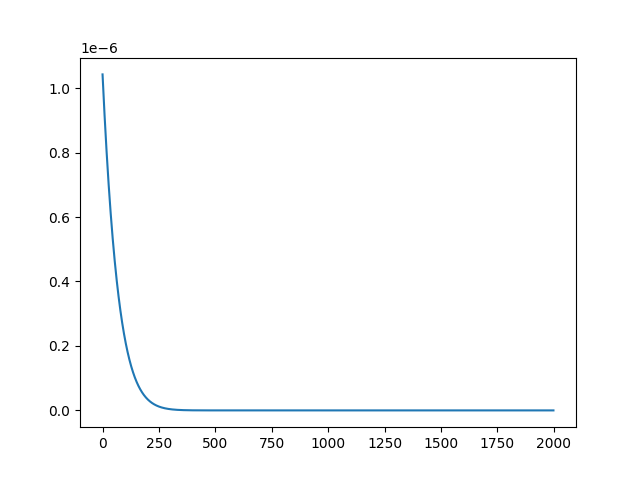

In [572]:
plt.clf()
GamPrimes = GamPrime( Ts, Tc, MB )
plt.plot( GamPrimes )
plt.show()

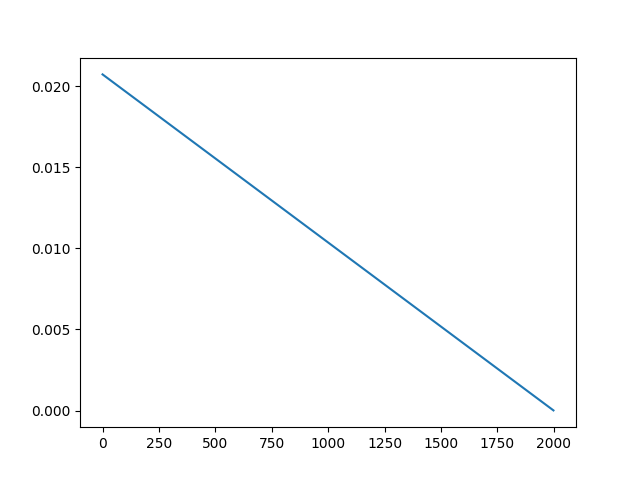

In [573]:
plt.clf()
DVPrimes = DVPrime_fitter( [Ts, MB],
                opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5], 
               )
plt.plot( DVPrimes )
plt.show()

In [574]:
# should be iterated

In [575]:
alpha = (1.0/3.0) 
vJ = ( np.sqrt(2.0*alpha/3.0 + alpha**2) + np.sqrt(1.0/3.0) ) / (1.0+alpha)

In [576]:
norm = 1.0
tol=1.0e-12

# initial values
Is_tmp = np.full( NTs, 0.0 )
Ps_tmp = np.exp(Is_tmp)

counter=0
while norm>tol:
    print(counter)
    counter+=1

    Is_tmp_old = Is_tmp
    
    # Hsqs = Ts**4/(3.0*MP**2) * ( np.pi**2/30.0 * gstar + DVPrimes*Ps_tmp )
    Hsqs = Ts**4/(3.0*MP**2) * ( np.pi**2/30.0 * gstar )
    Hinv = Hsqs**(-0.5)
    
    T2TpDTInt_=[]
    for iT in np.arange(0,NTs):
        tmp = []
        for iDT in np.arange(0,NTs-iT):
            integrand = dT * Hinv[iT:iT+iDT] * vJ
            tmp.append( np.sum(integrand) )
        T2TpDTInt_.append(tmp)
    T2TpDTInt = T2TpDTInt_
    
    Is_ = []
    for iT in np.arange(0,NTs):
        integral = 0.0
        for iDT in np.arange(0,NTs-iT):
            Tprime = iT+iDT
            integral += dT*Hinv[Tprime] * GamPrimes[Tprime] * T2TpDTInt[iT][iDT]**3
        Is_.append(integral * 4.0*np.pi/3.0 )
    Is_tmp = np.nan_to_num(np.array(Is_), nan=1.e10)
    
    Ps_tmp = np.exp(-Is_tmp)

    norm = np.sum( (Is_tmp_old - Is_tmp)**2 )

Ps = Ps_tmp
Is = Is_tmp

0
1


In [577]:
Is

array([2.35932278e+46, 2.31243086e+46, 2.26641034e+46, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

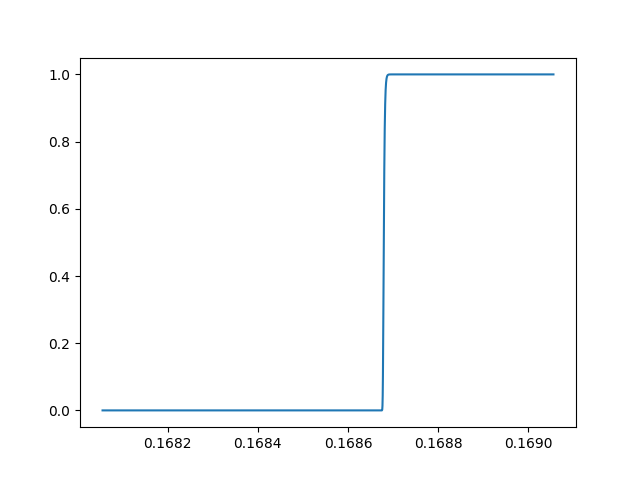

In [578]:
plt.clf()
plt.plot( Ts, Ps )
plt.show()

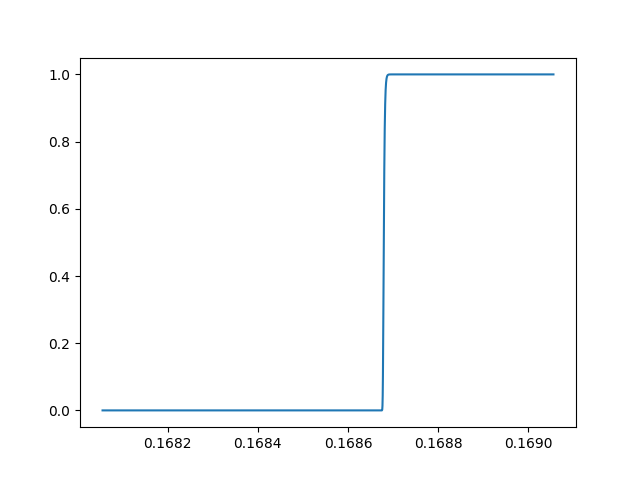

In [579]:
plt.clf()
plt.plot( Ts, Ps )
plt.show()

In [580]:
iTstar = np.argmin( (Is-0.34)**2 )
Tstar = Ts[iTstar]

Is[iTstar]

0.3374329616090861

In [581]:
iTstar, Tstar

(1249, 0.16868032124064294)

In [582]:
iTstar, Tstar

(1249, 0.16868032124064294)

In [583]:
Tc

0.16905582124064295

# GW parameters

In [584]:
# check numerical derivs

In [585]:
alpha

0.3333333333333333

In [586]:
def d_dT_DVPrime_fitter(T_MB, Mc, a0, b0, b1, gam0, gam1):
    MB = T_MB[1]
    return ( a0*(MB-Mc)**gam0 )

In [587]:
def d_dT_SclPrime_fitter(TmTc_MB, b, c1, c2, gam ):
    TmTc = TmTc_MB[0]
    MB = TmTc_MB[1]
    return -c1*(MB-Mc)**gam * (1.0 + b/(MB-Mc) )/TmTc**2 - 2.0* c2*(MB-Mc)**(2.*gam) * (1.0 + b/(MB-Mc) )**2/TmTc**3 # * ( 1.0 + a1*TmTc + b1*(MB-Mc) )

In [588]:
beta_tilde = Tstar * d_dT_SclPrime_fitter( [Tstar-Tc, MB], 
                                     opt_SclPrime_TmTc_MB[0][0], opt_SclPrime_TmTc_MB[0][1], opt_SclPrime_TmTc_MB[0][2],
                opt_SclPrime_TmTc_MB[0][3], # opt_SclPrime_TmTc_MB[0][4], # opt_SclPrime_TmTc_MB[0][5]
                                    )

In [589]:
DVPrime = DVPrime_fitter( [Tstar, MB], opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                    opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5]
                       )

In [590]:
dDVPrime_dT = d_dT_DVPrime_fitter( [Tstar, MB], opt_DVPrime_T_MB[0][0], opt_DVPrime_T_MB[0][1], opt_DVPrime_T_MB[0][2],
                opt_DVPrime_T_MB[0][3], 
                    opt_DVPrime_T_MB[0][4], opt_DVPrime_T_MB[0][5]
                       )

In [591]:
dDVPrime_dT

-20.73180089863974

In [592]:
beta_tilde

104866.89979420324

In [593]:
numer = Tstar*dDVPrime_dT
denom = Tstar*dDVPrime_dT + 4.0*DVPrime
alpha = (1.0/3.0) * numer/denom
vJ = ( np.sqrt(2.0*alpha/3.0 + alpha**2) + np.sqrt(1.0/3.0) ) / (1.0+alpha)

In [594]:
kappa_v = np.sqrt(alpha)/(0.135+np.sqrt(0.98+alpha))
Om_HSDM = gstar_HSDM / (gstar_HSDM+gstar_SM)

In [595]:
alpha, kappa_v, vJ

(0.3363281394957064, 0.45225919649665075, 0.8666704193072916)

In [596]:
Ubarfsq = 3.0/4.0 * alpha/(1.0+alpha) * kappa_v

In [597]:
# 1.0 / np.sqrt( 1.0 + 2.0*(8.0*np.pi)**(1.0/3.0) * vJ / ( beta_tilde*np.sqrt(Ubarfsq) ) )

In [598]:
tau_sw = 1 - 1.0 / np.sqrt( 1.0 + 2.0*(8.0*np.pi)**(1.0/3.0) * vJ / ( beta_tilde*np.sqrt(Ubarfsq) ) )

In [599]:
kappa_sw = np.sqrt(tau_sw)*kappa_v

In [600]:
fpeak = 1.9*1.0e-5 * (gstar/100.)**(1.0/6.0) * (Tstar*sqrt_t0_inv_GeV/100.) * (beta_tilde / vJ)
hsq_Omega_peak = 2.65*1.0e-6 * (vJ/beta_tilde) * (kappa_sw*alpha/(1.0+alpha))**2 * (100./gstar)**(1.0/3.0) * Om_HSDM**2

In [601]:
sqrt_t0_inv_GeV, MB*sqrt_t0_inv_GeV, Tstar*sqrt_t0_inv_GeV, alpha, beta_tilde, fpeak, hsq_Omega_peak

(506.3291139240506,
 2000.0,
 85.40775759019895,
 0.3363281394957064,
 104866.89979420324,
 2.0736758712478585,
 1.121032501551829e-18)

In [602]:
finalres_.append( [fpeak, hsq_Omega_peak, sqrt_t0_inv_GeV, MB, Tstar] )

In [603]:
finalres_


[[0.1501595782410117,
  1.7922382650393805e-19,
  15.384615384615385,
  3.25,
  0.1614177750210371],
 [0.32351923286295253,
  4.6114387300232434e-20,
  17.24137931034483,
  2.9,
  0.15767419991590864],
 [0.07009221128393926,
  3.9294462330115797e-20,
  3.4482758620689657,
  2.9,
  0.15767619991590864],
 [0.013220573386467274,
  6.889485721869404e-19,
  2.531645569620253,
  3.95,
  0.16870932124064295],
 [0.43403804805089874,
  1.257664719869601e-21,
  3.9215686274509807,
  2.55,
  0.15380083585578402],
 [0.0321342116646263,
  1.5652449381369532e-19,
  3.076923076923077,
  3.25,
  0.1614212750210371],
 [0.09044333862575976,
  4.227048215126573e-19,
  13.88888888888889,
  3.6,
  0.16508630756184325],
 [0.06169576859258447,
  7.910684149641432e-19,
  12.658227848101266,
  3.95,
  0.16870132124064294],
 [0.11978050821891995,
  8.395664448201096e-19,
  25.31645569620253,
  3.95,
  0.16869782124064295],
 [0.11978050821891995,
  8.395664448201096e-19,
  25.31645569620253,
  3.95,
  0.16869782

# comparison

In [604]:
finalres_

[[0.1501595782410117,
  1.7922382650393805e-19,
  15.384615384615385,
  3.25,
  0.1614177750210371],
 [0.32351923286295253,
  4.6114387300232434e-20,
  17.24137931034483,
  2.9,
  0.15767419991590864],
 [0.07009221128393926,
  3.9294462330115797e-20,
  3.4482758620689657,
  2.9,
  0.15767619991590864],
 [0.013220573386467274,
  6.889485721869404e-19,
  2.531645569620253,
  3.95,
  0.16870932124064295],
 [0.43403804805089874,
  1.257664719869601e-21,
  3.9215686274509807,
  2.55,
  0.15380083585578402],
 [0.0321342116646263,
  1.5652449381369532e-19,
  3.076923076923077,
  3.25,
  0.1614212750210371],
 [0.09044333862575976,
  4.227048215126573e-19,
  13.88888888888889,
  3.6,
  0.16508630756184325],
 [0.06169576859258447,
  7.910684149641432e-19,
  12.658227848101266,
  3.95,
  0.16870132124064294],
 [0.11978050821891995,
  8.395664448201096e-19,
  25.31645569620253,
  3.95,
  0.16869782124064295],
 [0.11978050821891995,
  8.395664448201096e-19,
  25.31645569620253,
  3.95,
  0.16869782

In [605]:
res = np.array(finalres_)

In [606]:
dat = np.loadtxt("peak-integrated_sensitivities/pis_s.dat")
LISA = np.loadtxt("power-law-integrated_sensitivities/plis_LISA.dat")
BBO = np.loadtxt("power-law-integrated_sensitivities/plis_BBO.dat")
DECIGO = np.loadtxt("power-law-integrated_sensitivities/plis_DECIGO.dat")

HLVO2 = np.loadtxt("power-law-integrated_sensitivities/plis_HLVO2.dat")

In [607]:
# plt.clf()

# fig = plt.figure()
# ax = plt.axes()

# # d=np.zeros(len(dat))+1.0

# ax.fill_between( 10**dat.T[0], 10**dat.T[1], 1.0, label="LISA", alpha=0.2 )
# ax.fill_between( 10**dat.T[0], 10**dat.T[2], 1.0, label="DECIGO", alpha=0.2 )
# ax.fill_between( 10**dat.T[0], 10**dat.T[3], 1.0, label="BBO", alpha=0.2 )

# plt.scatter( res.T[0], res.T[1] )

# plt.xscale("log")
# plt.yscale("log")

# plt.ylim(10**-18, 10**-10)
# plt.xlim(10**-4, 10)

# plt.legend()

# plt.title("peak-integrated sensitivity")
# plt.show()

In [608]:
(res.T[2] * res.T[3]) [0]

50.0

In [609]:
res.T[2] * res.T[4]

array([ 2.48335038,  2.71852069,  0.54371103,  0.42711221,  0.60314053,
        0.49668085,  2.29286538,  2.13545976,  4.27083092,  4.27083092,
        8.5414593 , 21.35301535, 85.40775759])

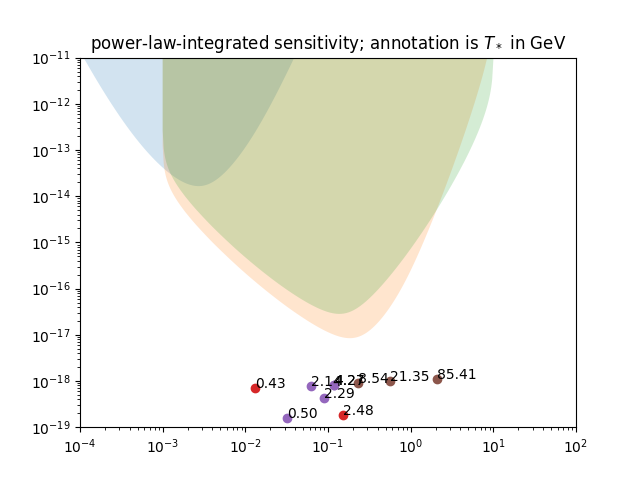

In [612]:
plt.clf()

fig = plt.figure()
ax = plt.axes()

# d=np.zeros(len(dat))+1.0

ax.fill_between( 10**LISA.T[0], 10**LISA.T[1], 1.0, label="LISA", alpha=0.2 )
ax.fill_between( 10**BBO.T[0], 10**BBO.T[1], 1.0, label="BBO", alpha=0.2 )
ax.fill_between( 10**DECIGO.T[0], 10**DECIGO.T[1], 1.0, label="DECIGO", alpha=0.2 )
# ax.fill_between( 10**HLVO2.T[0], 10**HLVO2.T[1], 1.0, label="HLVO2", alpha=0.2 )

#######################################

rmin=0
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

#######################################

rmin=5
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

#######################################

rmin=10
rmax=rmin+5
x = res.T[0][rmin:rmax]
y = res.T[1][rmin:rmax]
n = (res.T[2]*res.T[4])[rmin:rmax]

num=(res.T[2] * res.T[3]) [rmin]
ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
for i, txt in enumerate(n):
    txt2 = '{:.2f}'.format(txt)
    ax.annotate(txt2, (x[i], y[i]))

# #######################################

# rmin=15
# rmax=rmin+5
# x = res.T[0][rmin:rmax]
# y = res.T[1][rmin:rmax]
# n = (res.T[2]*res.T[4])[rmin:rmax]

# num=(res.T[2] * res.T[3]) [rmin]
# ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
# for i, txt in enumerate(n):
#     txt2 = '{:.2f}'.format(txt)
#     ax.annotate(txt2, (x[i], y[i]))

# #######################################

# rmin=20
# rmax=rmin+5
# x = res.T[0][rmin:rmax]
# y = res.T[1][rmin:rmax]
# n = (res.T[2]*res.T[4])[rmin:rmax]

# num=(res.T[2] * res.T[3]) [rmin]
# ax.scatter( x, y, label="$M_B="+str(num)+"$GeV" )
# for i, txt in enumerate(n):
#     txt2 = '{:.2f}'.format(txt)
#     ax.annotate(txt2, (x[i], y[i]))

#######################################


plt.xscale("log")
plt.yscale("log")

plt.ylim(10**-19, 10**-11)
plt.xlim(10**-4, 100)


# plt.legend()

plt.title("power-law-integrated sensitivity; annotation is $T_*$ in GeV")

plt.savefig("sensitivity.pdf", bbox_inches='tight')
plt.show()

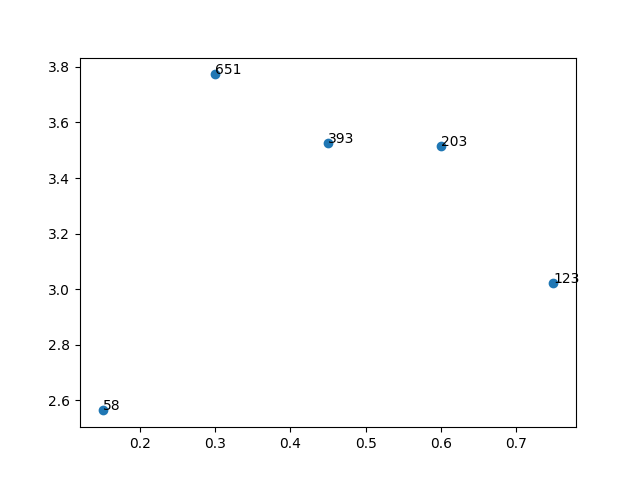

In [523]:
x = [0.15, 0.3, 0.45, 0.6, 0.75]
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
n = [58, 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))